# Gauss quadrature of sqrt(x-0.5)

Let us compute
$$
\int_0^1 \sqrt{|x-1/2|} dx = \frac{\sqrt{2}}{3}
$$
We will compute this with Gauss-Legendre quadrature and also by breaking it into two parts
$$
\int_0^{1/2} \sqrt{|x-1/2|} dx + \int_{1/2}^1 \sqrt{|x-1/2|} dx
$$

    2   6.588045e-02   0.0000e+00   2.859548e-02   0.0000e+00
    4   2.572864e-02   2.5606e+00   5.105786e-03   5.6006e+00
    8   9.738642e-03   2.6419e+00   8.209359e-04   6.2195e+00
   16   3.583266e-03   2.7178e+00   1.194398e-04   6.8732e+00
   32   1.294540e-03   2.7680e+00   1.623859e-05   7.3553e+00
   64   4.628656e-04   2.7968e+00   2.121816e-06   7.6532e+00
  128   1.645897e-04   2.8122e+00   2.713392e-07   7.8198e+00


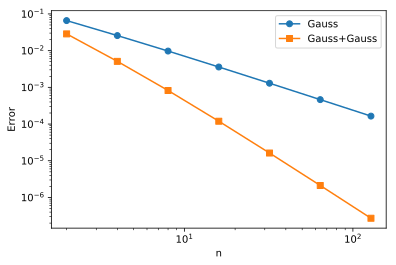

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from scipy.integrate import fixed_quad
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sqrt(np.abs(x-0.5))
a,b = 0.0,1.0
c = 0.5*(a+b)
qe = np.sqrt(2.0)/3.0 # Exact integral

n,N = 2,7
err1,err2,nodes = np.zeros(N),np.zeros(N),np.zeros(N)
for i in range(N):
    nodes[i] = n
    val = fixed_quad(f,a,b,n=n)
    err1[i] = np.abs(val[0]-qe)
    val = fixed_quad(f,a,c,n=n/2) + fixed_quad(f,c,b,n=n/2)
    err2[i] = np.abs(val[0]+val[2]-qe)
    if i>0:
        print('%5d %14.6e %12.4e %14.6e %12.4e' % 
              (n,err1[i],err1[i-1]/err1[i],err2[i],err2[i-1]/err2[i]))
    else:
        print('%5d %14.6e %12.4e %14.6e %12.4e' % (n,err1[i],0,err2[i],0))
    n = 2*n

plt.figure()
plt.loglog(nodes,err1,'o-',nodes,err2,'s-')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend(('Gauss','Gauss+Gauss'));